In [ ]:
from google.colab import files
uploded=files.upload()

Saving spam.csv to spam.csv


In [ ]:
import pandas as pd
import io
data=pd.read_csv(io.BytesIO(uploded['spam.csv']), encoding='latin-1')

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
data.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [ ]:
data[data['Unnamed: 2']!=None].count()

v1            5572
v2            5572
Unnamed: 2      50
Unnamed: 3      12
Unnamed: 4       6
dtype: int64

In [ ]:
data.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


Text(0, 0.5, 'nomber of ham and spam msg')

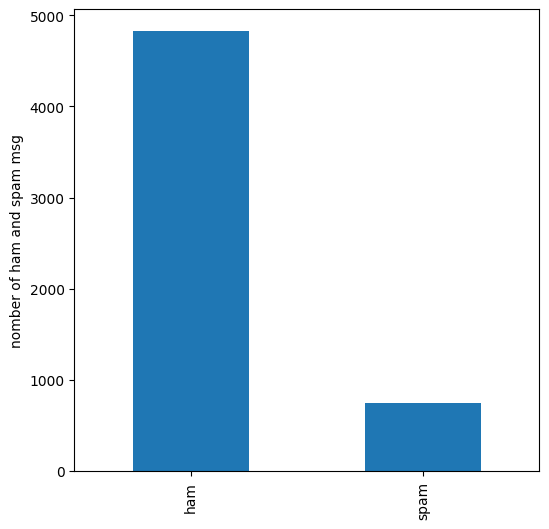

In [ ]:
ax=data['v1'].value_counts().plot(kind='bar', figsize=(6,6))
ax.set_ylabel('nomber of ham and spam msg')

In [ ]:
data['v2'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Name: v2, Length: 5572, dtype: bool

In [ ]:
data['v2'].duplicated().count()

5572

In [ ]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns')
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(data,random_state=42,test_size=0.2)

In [ ]:
#intantiating TfidfVectorizer object
from sklearn.feature_extraction.text import TfidfVectorizer
transormer=TfidfVectorizer(stop_words='english', ngram_range=(1,2), lowercase=True,max_features=80000)

In [ ]:
#getting tf_idf vectors
tf_idf_train=transormer.fit_transform(train_set['v2'])
tf_idf_test=transormer.transform(test_set['v2'])

In [ ]:
#intantiating the moidel
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=17,n_jobs=4)

In [ ]:
#importing necessary libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
#getting the model's accuracy score
skf=StratifiedKFold(n_splits=10, shuffle=True,random_state=17)
result=cross_val_score(model,tf_idf_train ,train_set['v1'],cv=skf,scoring='f1_micro')
print(result.mean())

0.9255096488134228


In [ ]:
#fitting the model on this data
model.fit(tf_idf_train,train_set['v1'])

LogisticRegression(n_jobs=4, random_state=17)

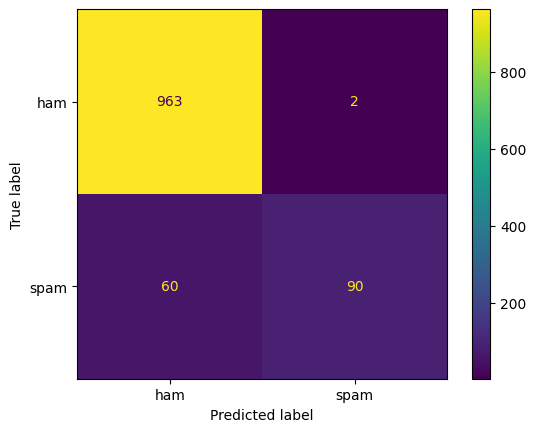

In [ ]:
#getting the confusion matrix
predictions=model.predict(tf_idf_test)
cm= confusion_matrix(test_set['v1'],predictions)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_).plot()
plt.show()